In [30]:
%pylab inline
import numpy as np
import nose.tools as tests

Populating the interactive namespace from numpy and matplotlib


In [97]:
def learn(options, p_choose, reward_funcs, a, b, n_steps, history_considered=1):
    p_choose_collector = [p_choose.copy()]
    choice_history = []
    for _ in range(n_steps):
        choice = np.random.choice(options, p=p_choose)
        choice_history.append(choice)
        reward_determinant = ''.join([str(c) for c in choice_history[-history_considered:]])
        reward = reward_funcs[reward_determinant]()
        old_prob = p_choose[choice]
        if reward > 0:
            new_prob = old_prob + a * (1-old_prob)
        else:
            new_prob = old_prob - b * old_prob

        scaling = (1-new_prob)/(1-old_prob)
        p_choose *= scaling
        p_choose[choice] = new_prob

        p_choose_collector.append(p_choose.copy())
        tests.assert_almost_equal(sum(p_choose), 1)

    return np.array(p_choose_collector)

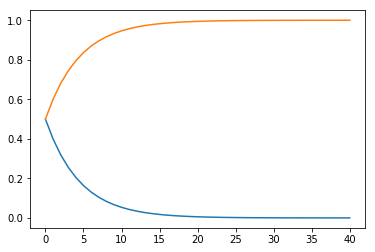

In [98]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 0), 
                '1':lambda: np.random.binomial(1, 1)}  # need not sum to 1

a = 0.2  # reward learning rate
b = 0.2  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 40)
plt.plot(p_history);

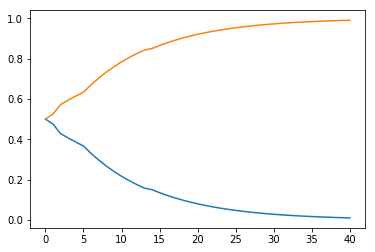

In [100]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 0), 
                '1':lambda: np.random.binomial(1, 1)}  # need not sum to 1

a = 0.1  # reward learning rate
b = 0.05  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 40)
plt.plot(p_history);

# Inconsistent reward

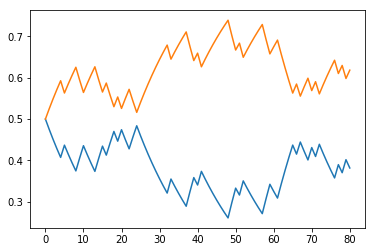

In [101]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 0), 
                '1':lambda: np.random.binomial(1, .5)}  # need not sum to 1

a = 0.05  # reward learning rate
b = 0.05  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 80)
plt.plot(p_history);

### Extinction of creativity

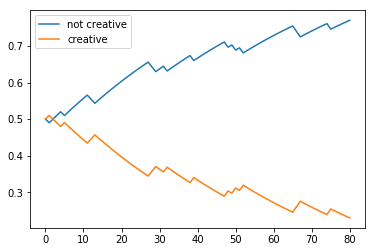

In [131]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, .8), 
                '1':lambda: np.random.binomial(1, .1)}  # need not sum to 1

a = 0.02  # reward learning rate
b = 0.02  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 80)
plt.plot(p_history);
plt.legend(['not creative', 'creative'])

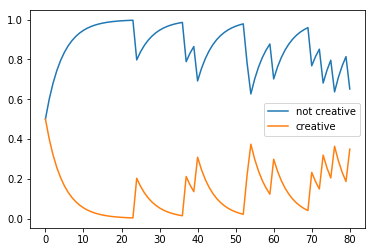

In [129]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, .8), 
                '1':lambda: np.random.binomial(1, .1)}  # need not sum to 1

a = 0.2  # reward learning rate
b = 0.2  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 80)
plt.plot(p_history);
plt.legend(['not creative', 'creative'])

# Superstitious Learning

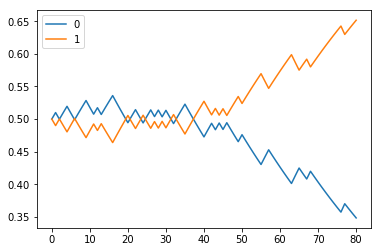

In [159]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 1), 
                '1':lambda: np.random.binomial(1, 1)}  # need not sum to 1

a = 0.02  # reward learning rate
b = 0.02  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 80)
plt.plot(p_history)
plt.legend([0,1])

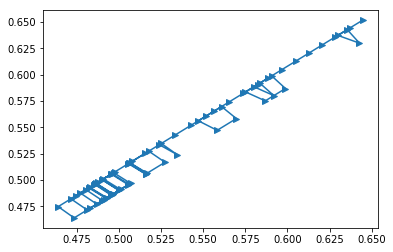

In [161]:
plt.plot(p_history[:,1][:-1], p_history[:,1][1:], '->')

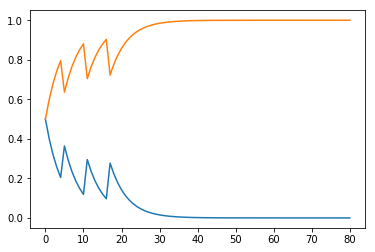

In [105]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 1), 
                '1':lambda: np.random.binomial(1, 1)}  # need not sum to 1

a = 0.2  # reward learning rate
b = 0.2  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 80)
plt.plot(p_history);

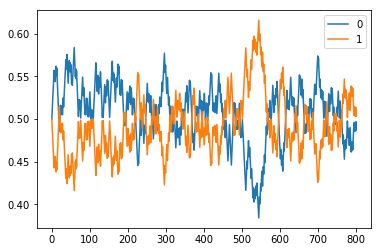

In [157]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 0), 
                '1':lambda: np.random.binomial(1, 0)}  # need not sum to 1

a = 0.02  # reward learning rate
b = 0.02  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 800)
plt.plot(p_history)
plt.legend([0,1]);

# Learning with history

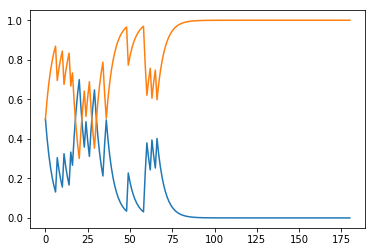

In [111]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 0),
                '1':lambda: np.random.binomial(1, .5),
                '00':lambda: np.random.binomial(1, 0),
                '01':lambda: np.random.binomial(1, .5),
                '10':lambda: np.random.binomial(1, .5),
                '11':lambda: np.random.binomial(1, 1)}  # need not sum to 1

a = 0.2  # reward learning rate
b = 0.2  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 180, 2)
plt.plot(p_history);

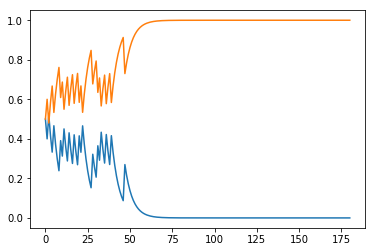

In [122]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 0),
                '1':lambda: np.random.binomial(1, 0),
                '00':lambda: np.random.binomial(1, 0),
                '01':lambda: np.random.binomial(1, 0),
                '10':lambda: np.random.binomial(1, 0),
                '11':lambda: np.random.binomial(1, 1)}  # need not sum to 1

a = 0.2  # reward learning rate
b = 0.2  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 180, 2)
plt.plot(p_history);

### reward consistency

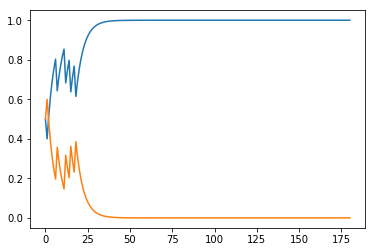

In [118]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 0),
                '1':lambda: np.random.binomial(1, 0),
                '00':lambda: np.random.binomial(1, 1),
                '01':lambda: np.random.binomial(1, 0),
                '10':lambda: np.random.binomial(1, 0),
                '11':lambda: np.random.binomial(1, 1)}  # need not sum to 1

a = 0.2  # reward learning rate
b = 0.2  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 180, 2)
plt.plot(p_history);

### reward inconsistency

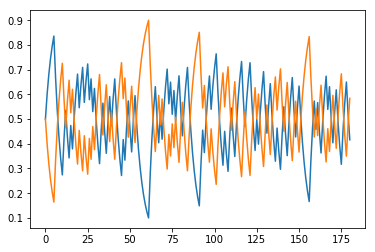

In [120]:
options = [0,1]
p_choose = np.array([.5, .5])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, 0),
                '1':lambda: np.random.binomial(1, 0),
                '00':lambda: np.random.binomial(1, 0),
                '01':lambda: np.random.binomial(1, 1),
                '10':lambda: np.random.binomial(1, 1),
                '11':lambda: np.random.binomial(1, 0)}  # need not sum to 1

a = 0.2  # reward learning rate
b = 0.2  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 180, 2)
plt.plot(p_history);

# three choices

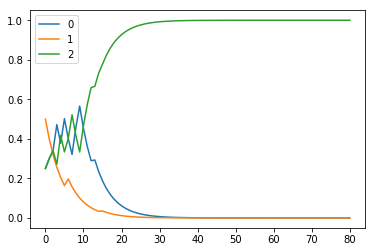

In [116]:
options = [0,1,2]
p_choose = np.array([.25, .5, .25])  # should sum to 1
reward_funcs = {'0':lambda: np.random.binomial(1, .5), 
                '1':lambda: np.random.binomial(1, 0),
                '2':lambda: np.random.binomial(1, 1),}  # need not sum to 1

a = 0.2  # reward learning rate
b = 0.2  # non-reward learning rate

p_history = learn(options, p_choose, reward_funcs, a, b, 80)
plt.plot(p_history)
plt.legend(options);